<a href="https://colab.research.google.com/github/sabatini-06/Project-3/blob/main/Crop_production_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FAOSTAT_data.csv to FAOSTAT_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FAOSTAT_data.csv']))

In [ ]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [ ]:
# removing Note column
df.drop('Note', axis=1, inplace=True)

In [ ]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       224647 non-null  object 
 1   Domain            224647 non-null  object 
 2   Area Code (M49)   224647 non-null  int64  
 3   Area              224647 non-null  object 
 4   Element Code      224647 non-null  int64  
 5   Element           224647 non-null  object 
 6   Item Code (CPC)   224642 non-null  object 
 7   Item              224647 non-null  object 
 8   Year Code         224647 non-null  int64  
 9   Year              224647 non-null  int64  
 10  Unit              224645 non-null  object 
 11  Value             218130 non-null  float64
 12  Flag              224643 non-null  object 
 13  Flag Description  224634 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 24.0+ MB


In [ ]:
#checking missing values
df.isnull().sum()

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (CPC),5
Item,0
Year Code,0
Year,0


In [ ]:
# Remove rows where 'Unit' or 'Value' are missing
df.dropna(subset=['Unit', 'Value'], inplace=True)

In [ ]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218128 entries, 0 to 224645
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       218128 non-null  object 
 1   Domain            218128 non-null  object 
 2   Area Code (M49)   218128 non-null  int64  
 3   Area              218128 non-null  object 
 4   Element Code      218128 non-null  int64  
 5   Element           218128 non-null  object 
 6   Item Code (CPC)   218124 non-null  object 
 7   Item              218128 non-null  object 
 8   Year Code         218128 non-null  int64  
 9   Year              218128 non-null  int64  
 10  Unit              218128 non-null  object 
 11  Value             218128 non-null  float64
 12  Flag              218124 non-null  object 
 13  Flag Description  218115 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 25.0+ MB


In [ ]:
#checking missing values
df.isnull().sum()

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (CPC),4
Item,0
Year Code,0
Year,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:

df.shape

(218128, 14)

In [ ]:
df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value
count,218128.000000,218128.000000,218128.000000,218128.000000,2.181280e+05
mean,425.896304,5407.085253,2020.973447,2020.973447,8.984930e+05
std,254.252501,101.036136,1.403211,1.403211,1.201908e+07
min,4.000000,5111.000000,2019.000000,2019.000000,0.000000e+00
25%,203.000000,5312.000000,2020.000000,2020.000000,9.370000e+02
50%,410.000000,5412.000000,2021.000000,2021.000000,7.228200e+03
75%,643.000000,5510.000000,2022.000000,2022.000000,5.135256e+04
max,894.000000,5513.000000,2023.000000,2023.000000,7.825858e+08


In [ ]:
print(df['Year'].unique())

[2019 2020 2021 2022 2023]


In [ ]:
print(df['Element'].unique())

['Area harvested' 'Yield' 'Production' 'Stocks'
 'Producing Animals/Slaughtered' 'Laying' 'Yield/Carcass Weight'
 'Milk Animals']


In [ ]:
# Data Visualization
len(df['Area'].unique())

200

In [ ]:
len(df['Item'].unique())

275

In [ ]:

# Load the dataset
df = pd.read_csv("FAOSTAT_data.csv")

# Convert 'Item' column to lowercase for consistent filtering
df['Item_lower'] = df['Item'].str.lower()

# Define a list of common livestock-related keywords
livestock_keywords = ['meat', 'milk', 'eggs', 'live', 'animal', 'bovine', 'mutton', 'pig', 'poultry']

# Filter out rows where 'Item' contains any livestock keyword
df_crop = df[~df['Item_lower'].str.contains('|'.join(livestock_keywords))].copy()

# Drop the temporary lowercase column used for filtering
df_crop.drop(columns=['Item_lower'], inplace=True)


In [ ]:
# Overview
print(df_crop.info())

# Check unique crop types
print(df_crop['Item'].unique())

# Summary statistics
print(df_crop.describe())

# Group by crop and summarize production
production_summary = df_crop[df_crop['Element'] == 'Production'].groupby('Item')['Value'].sum().sort_values(ascending=False)
print(production_summary.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 182788 entries, 0 to 224646
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       182788 non-null  object 
 1   Domain            182788 non-null  object 
 2   Area Code (M49)   182788 non-null  int64  
 3   Area              182788 non-null  object 
 4   Element Code      182788 non-null  int64  
 5   Element           182788 non-null  object 
 6   Item Code (CPC)   182785 non-null  object 
 7   Item              182788 non-null  object 
 8   Year Code         182788 non-null  int64  
 9   Year              182788 non-null  int64  
 10  Unit              182787 non-null  object 
 11  Value             177000 non-null  float64
 12  Flag              182784 non-null  object 
 13  Flag Description  182780 non-null  object 
 14  Note              4829 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 22.3+ MB
None
['Almonds

In [ ]:
# Keep only relevant elements
elements_to_keep = ['Area harvested', 'Yield', 'Production']
df_crop = df_crop[df_crop['Element'].isin(elements_to_keep)]

# Pivot the data to wide format
df_pivot = df_crop.pivot_table(
    index=['Area', 'Item', 'Year'],
    columns='Element',
    values='Value',
    aggfunc='first'  # In case of duplicates, take the first
).reset_index()

# Optional: Rename columns for clarity
df_pivot.columns.name = None  # Remove multi-index name
df_pivot.rename(columns={
    'Area harvested': 'Area_Harvested_ha',
    'Yield': 'Yield_kg_per_ha',
    'Production': 'Production_tonnes'
}, inplace=True)

# View the reshaped DataFrame
print(df_pivot.head())

          Area               Item  Year  Area_Harvested_ha  Production_tonnes  \
0  Afghanistan  Almonds, in shell  2019            29203.0            38205.0   
1  Afghanistan  Almonds, in shell  2020            22134.0            39307.0   
2  Afghanistan  Almonds, in shell  2021            36862.0            64256.0   
3  Afghanistan  Almonds, in shell  2022            36462.0            63515.0   
4  Afghanistan  Almonds, in shell  2023            37000.0            67000.0   

   Yield_kg_per_ha  
0           1308.3  
1           1775.9  
2           1743.2  
3           1742.0  
4           1810.8  


In [ ]:
# Basic statistics
print("\nBasic statistics:\n", df_crop.describe())


Basic statistics:
        Area Code (M49)   Element Code      Year Code           Year  \
count    165321.000000  165321.000000  165321.000000  165321.000000   
mean        425.839573    5422.430665    2020.978321    2020.978321   
std         254.696087      82.935200       1.404816       1.404816   
min           4.000000    5312.000000    2019.000000    2019.000000   
25%         203.000000    5312.000000    2020.000000    2020.000000   
50%         410.000000    5412.000000    2021.000000    2021.000000   
75%         643.000000    5510.000000    2022.000000    2022.000000   
max         894.000000    5510.000000    2023.000000    2023.000000   

              Value  
count  1.599190e+05  
mean   4.340116e+05  
std    7.027861e+06  
min    0.000000e+00  
25%    8.360000e+02  
50%    5.610000e+03  
75%    2.966506e+04  
max    7.825858e+08  


In [ ]:
# Check for duplicates
print("\nNumber of duplicate rows:", df_crop.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
df.shape

(224647, 16)

In [ ]:
# Filter for a specific crop, region, and year
specific_crop = 'Almonds, in shell'  # Replace with the desired crop
specific_area = 'Afghanistan'  # Replace with the desired region
specific_year = 2020  # Replace with the desired year

# Filter the pivoted DataFrame
filtered_production = df_pivot[
    (df_pivot['Item'] == specific_crop) &
    (df_pivot['Area'] == specific_area) &
    (df_pivot['Year'] == specific_year)
]

# Check if the filtered DataFrame is empty
if not filtered_production.empty:
    # Extract the production value
    total_production = filtered_production['Production_tonnes'].iloc[0]
    print(f"Total production of {specific_crop} in {specific_area} in {specific_year}: {total_production} tonnes")
else:
    print(f"No production data found for {specific_crop} in {specific_area} in {specific_year}")

Total production of Almonds, in shell in Afghanistan in 2020: 39307.0 tonnes


In [ ]:
# Filter for a specific crop, region, and year
specific_crop = 'Almonds, in shell'  # Replace with the desired crop
specific_area = 'Afghanistan'  # Replace with the desired region
specific_year = 2019  # Replace with the desired year

# Filter the pivoted DataFrame
filtered_production = df_pivot[
    (df_pivot['Item'] == specific_crop) &
    (df_pivot['Area'] == specific_area) &
    (df_pivot['Year'] == specific_year)
]

# Check if the filtered DataFrame is empty
if not filtered_production.empty:
    # Extract the production value
    total_production = filtered_production['Production_tonnes'].iloc[0]
    print(f"Total production of {specific_crop} in {specific_area} in {specific_year}: {total_production} tonnes")
else:
    print(f"No production data found for {specific_crop} in {specific_area} in {specific_year}")

Total production of Almonds, in shell in Afghanistan in 2019: 38205.0 tonnes


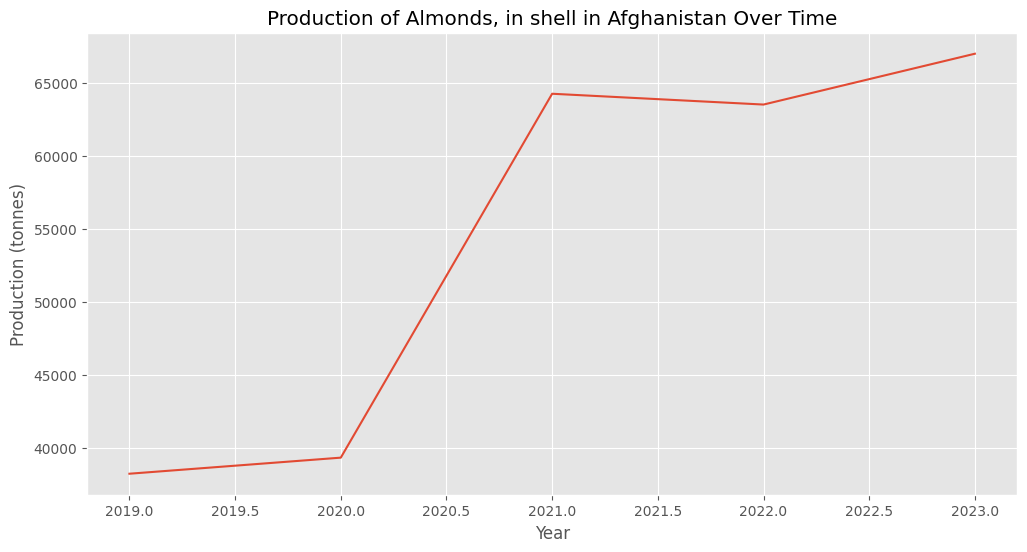

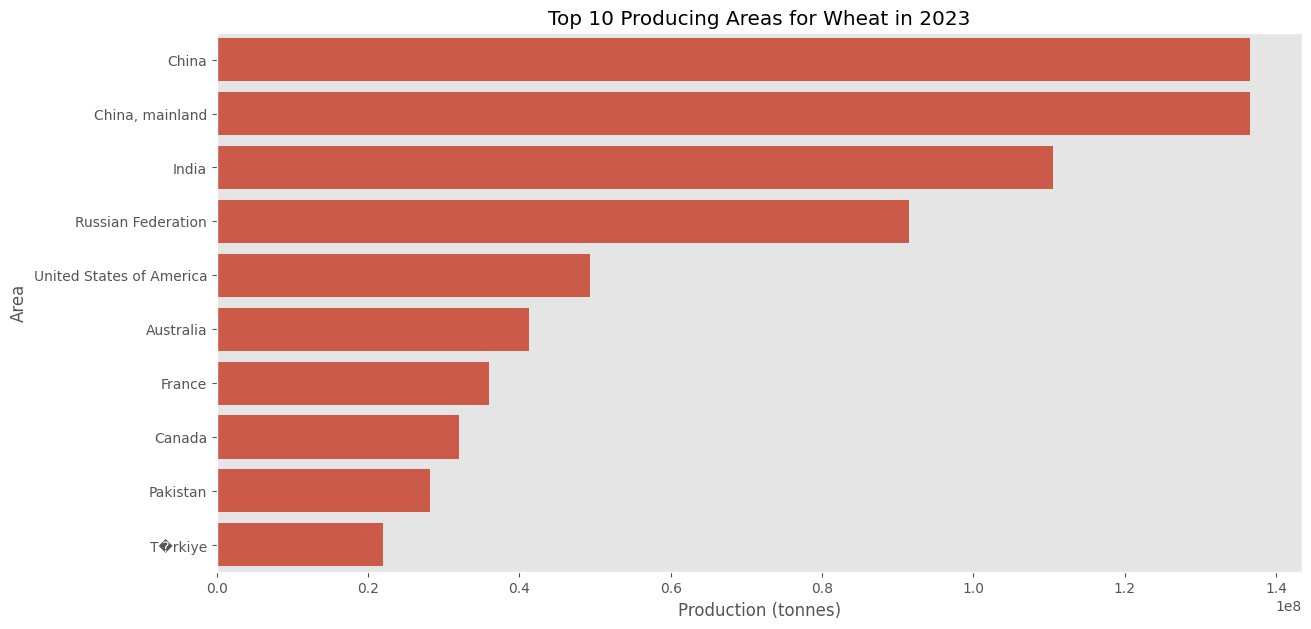

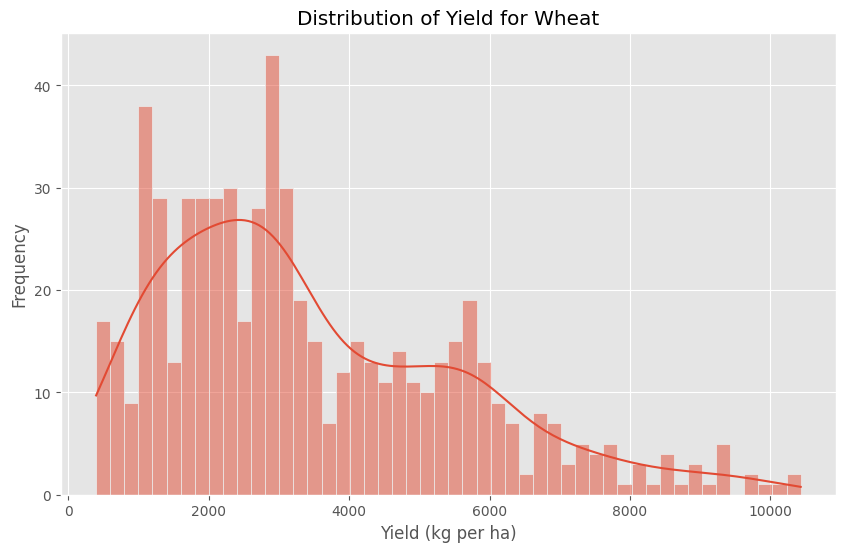

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1: Production Trend over Time for a Specific Crop and Area

specific_crop = 'Almonds, in shell'  # Replace with the desired crop
specific_area = 'Afghanistan'  # Replace with the desired region

# Filter data for the specific crop and area
trend_data = df_pivot[
    (df_pivot['Item'] == specific_crop) &
    (df_pivot['Area'] == specific_area)
]

# Sort by year to ensure correct plotting
trend_data = trend_data.sort_values(by='Year')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Year', y='Production_tonnes')
plt.title(f'Production of {specific_crop} in {specific_area} Over Time')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.grid(True)
plt.show()

# Example 2: Top N Producing Areas for a Specific Crop in a Given Year

specific_crop = 'Wheat'  # Replace with the desired crop
specific_year = 2023  # Replace with the desired year
top_n = 10 # Number of top areas to display

# Filter data for the specific crop and year
top_areas_data = df_pivot[
    (df_pivot['Item'] == specific_crop) &
    (df_pivot['Year'] == specific_year)
]

# Sort by production and get the top N
top_areas_data = top_areas_data.sort_values(by='Production_tonnes', ascending=False).head(top_n)

plt.figure(figsize=(14, 7))
sns.barplot(data=top_areas_data, x='Production_tonnes', y='Area')
plt.title(f'Top {top_n} Producing Areas for {specific_crop} in {specific_year}')
plt.xlabel('Production (tonnes)')
plt.ylabel('Area')
plt.grid(axis='x')
plt.show()

# Example 3: Yield Distribution for a Specific Crop

specific_crop = 'Wheat' # Replace with the desired crop

# Filter data for the specific crop where Yield data exists
yield_data = df_pivot[
    (df_pivot['Item'] == specific_crop) &
    (df_pivot['Yield_kg_per_ha'].notna())
]

plt.figure(figsize=(10, 6))
sns.histplot(data=yield_data, x='Yield_kg_per_ha', bins=50, kde=True)
plt.title(f'Distribution of Yield for {specific_crop}')
plt.xlabel('Yield (kg per ha)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

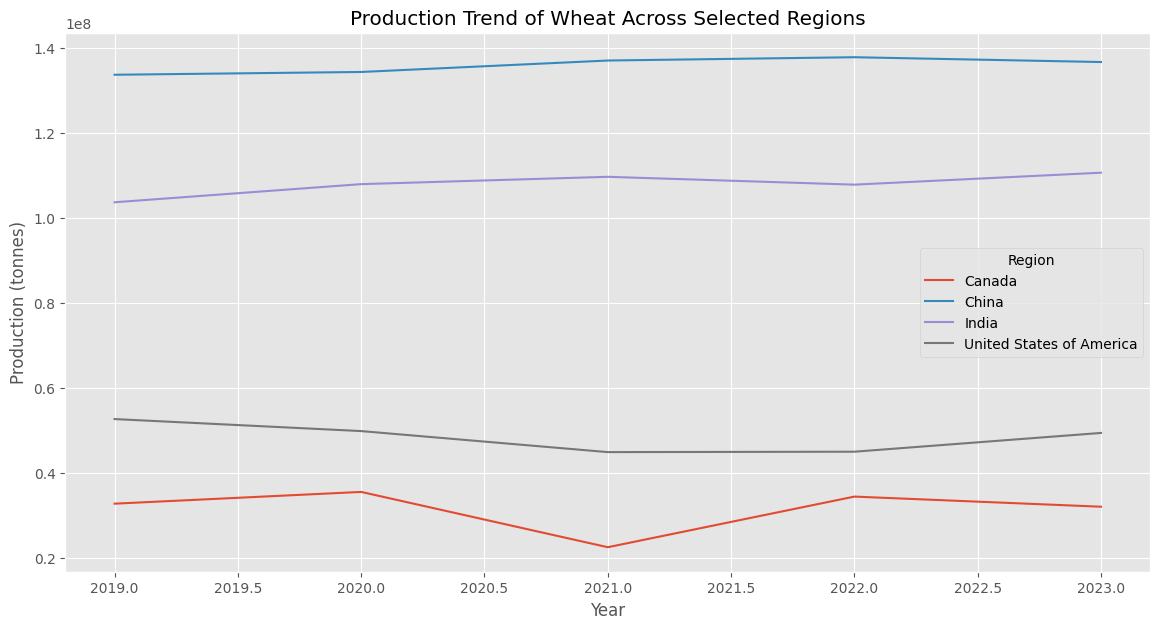

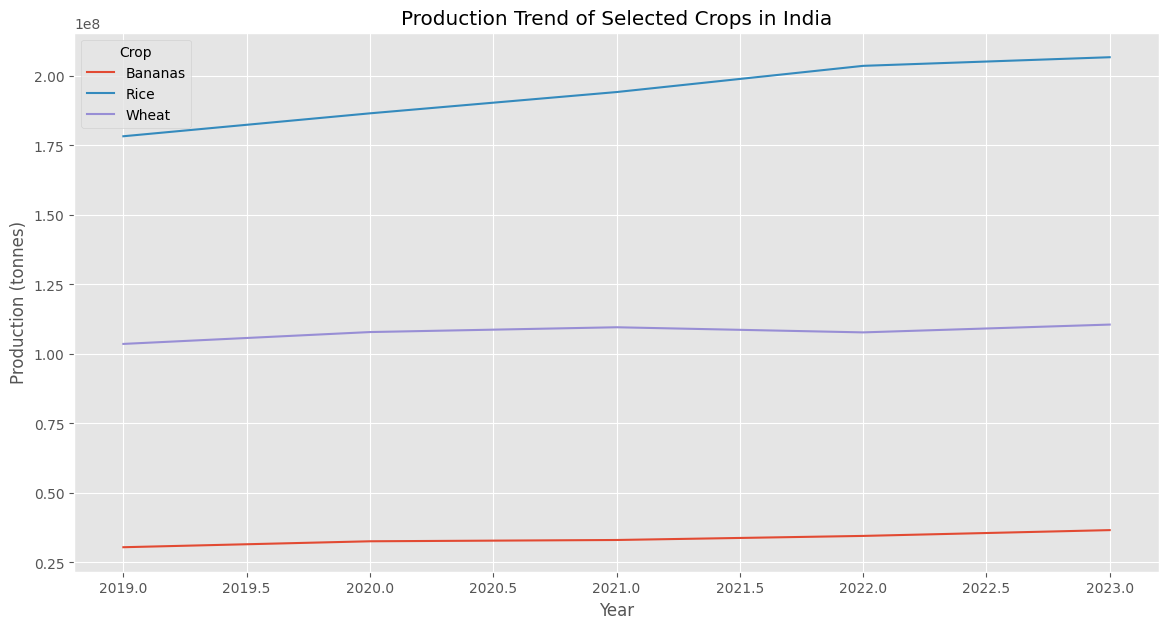

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1: Compare Production Trends of a Specific Crop Across Multiple Regions

specific_crop = 'Wheat' # Replace with the desired crop
areas_to_compare = ['United States of America', 'China', 'India', 'Canada'] # Replace with desired regions

# Filter data for the specific crop and selected areas
trend_data_multi_area = df_pivot[
    (df_pivot['Item'] == specific_crop) &
    (df_pivot['Area'].isin(areas_to_compare))
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure Area is treated as a category for consistent coloring
trend_data_multi_area['Area'] = trend_data_multi_area['Area'].astype('category')

plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_data_multi_area, x='Year', y='Production_tonnes', hue='Area')
plt.title(f'Production Trend of {specific_crop} Across Selected Regions')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.grid(True)
plt.legend(title='Region')
plt.show()

# Example 2: Compare Production Trends of Multiple Crops in a Specific Region

specific_area = 'India' # Replace with the desired region
crops_to_compare = ['Rice' , 'paddy', 'Wheat', 'Bananas' , 'Apple'] # Replace with desired crops

# Filter data for the specific region and selected crops
trend_data_multi_crop = df_pivot[
    (df_pivot['Area'] == specific_area) &
    (df_pivot['Item'].isin(crops_to_compare))
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure Item is treated as a category for consistent coloring
trend_data_multi_crop['Item'] = trend_data_multi_crop['Item'].astype('category')

plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_data_multi_crop, x='Year', y='Production_tonnes', hue='Item')
plt.title(f'Production Trend of Selected Crops in {specific_area}')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.grid(True)
plt.legend(title='Crop')
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


--- Model Evaluation for Wheat in India ---
Mean Squared Error (MSE): 3843605061558.38
Root Mean Squared Error (RMSE): 1960511.43
R-squared (R2): nan

--- Future Production Predictions ---
Predicted production for 2024: 112202783.38 tonnes
Predicted production for 2025: 113778479.59 tonnes
Predicted production for 2026: 115354175.79 tonnes
Predicted production for 2027: 116929871.99 tonnes
Predicted production for 2028: 118505568.19 tonnes


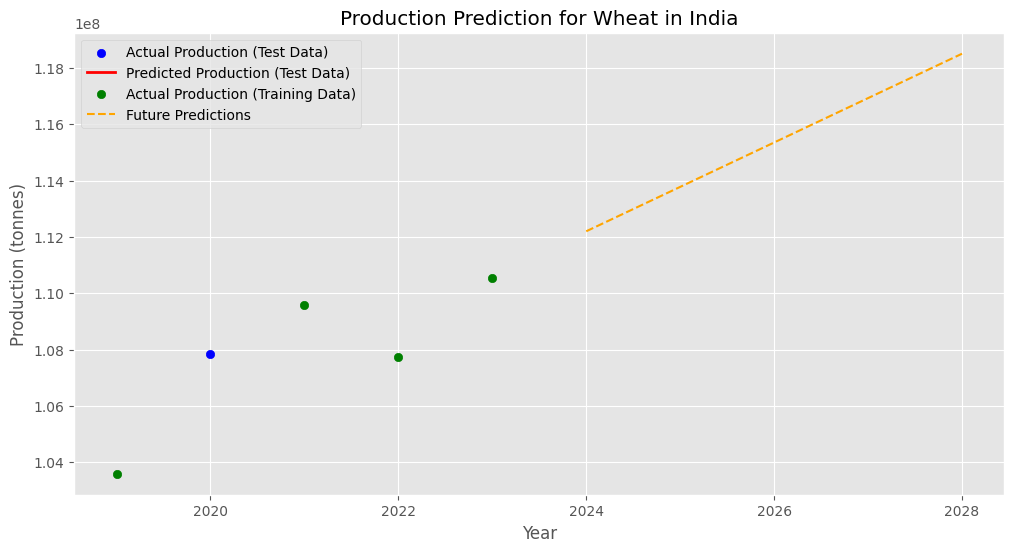

In [ ]:
# Install scikit-learn if you haven't already
!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Predictive Modeling Example ---

# Choose a specific crop and area for modeling
model_crop = 'Wheat'  # Replace with the desired crop
model_area = 'India'  # Replace with the desired area

# Filter the data for the chosen crop and area
model_data = df_pivot[
    (df_pivot['Item'] == model_crop) &
    (df_pivot['Area'] == model_area)
].copy()

# Check if there is enough data to train a model
if model_data.shape[0] < 2:
    print(f"Not enough data points for {model_crop} in {model_area} to build a model.")
else:
    # Prepare the data for the model
    # We'll use 'Year' as the feature (X) and 'Production_tonnes' as the target (y)
    # Reshape X as it needs to be a 2D array for scikit-learn
    X = model_data[['Year']].values
    y = model_data['Production_tonnes'].values

    # Split the data into training and testing sets
    # We'll use 80% for training and 20% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"--- Model Evaluation for {model_crop} in {model_area} ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # --- Making Predictions for Future Years ---
    # Let's predict production for the next 5 years after the last year in the data
    last_year = model_data['Year'].max()
    future_years = np.array([[year] for year in range(last_year + 1, last_year + 6)])

    # Predict production for future years
    future_predictions = model.predict(future_years)

    print("\n--- Future Production Predictions ---")
    for year, prediction in zip(future_years.flatten(), future_predictions):
        # Ensure predictions are not negative, as production cannot be less than 0
        predicted_production = max(0, prediction)
        print(f"Predicted production for {year}: {predicted_production:.2f} tonnes")

    # --- Visualize Actual vs. Predicted ---
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Production (Test Data)')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Production (Test Data)')
    plt.scatter(X_train, y_train, color='green', label='Actual Production (Training Data)')
    plt.plot(future_years, future_predictions, color='orange', linestyle='--', label='Future Predictions') # Plot future predictions
    plt.title(f'Production Prediction for {model_crop} in {model_area}')
    plt.xlabel('Year')
    plt.ylabel('Production (tonnes)')
    plt.legend()
    plt.grid(True)
    plt.show()

--- Model Evaluation for Apricots in China ---
Mean Squared Error (MSE): 67302580.55
Root Mean Squared Error (RMSE): 8203.81
R-squared (R2): NaN

--- Future Production Predictions ---
Predicted production for 2024: 80540.14 tonnes
Predicted production for 2025: 83764.10 tonnes
Predicted production for 2026: 86988.07 tonnes
Predicted production for 2027: 90212.03 tonnes
Predicted production for 2028: 93435.99 tonnes


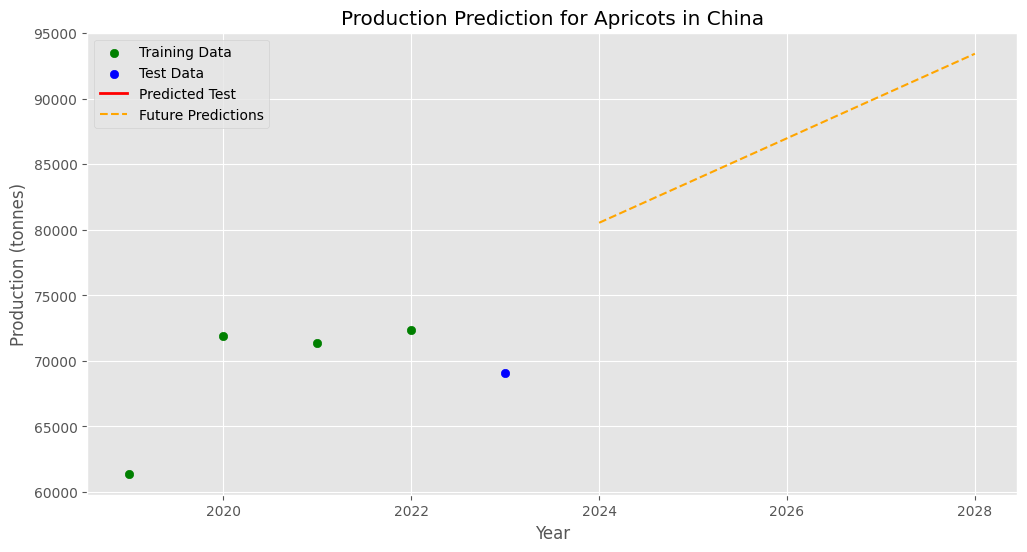

In [ ]:
# Install scikit-learn if you haven't already
# !pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Predictive Modeling Example ---

# Choose a specific crop and area for modeling
model_crop = 'Apricots'  # Replace with the desired crop
model_area = 'China'     # Replace with the desired area

# Filter the data for the chosen crop and area
model_data = df_pivot[
    (df_pivot['Item'] == model_crop) &
    (df_pivot['Area'] == model_area)
].copy()

# Check if there is enough data to train a model
if model_data.shape[0] < 2:
    print(f"Not enough data points for {model_crop} in {model_area} to build a model.")
else:
    # Prepare the data
    X = model_data[['Year']].values
    y = model_data['Production_tonnes'].values

    # Use all data for training if data is very small
    if len(X) < 5:
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred) if np.var(y) != 0 else float('nan')

        print(f"--- Model Evaluation for {model_crop} in {model_area} (All data used for training) ---")
    else:
        # Use time-aware split (no shuffle)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, shuffle=False
        )

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred) if np.var(y_test) != 0 else float('nan')

        print(f"--- Model Evaluation for {model_crop} in {model_area} ---")

    # Print evaluation metrics
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {'NaN' if np.isnan(r2) else f'{r2:.2f}'}")

    # --- Making Predictions for Future Years ---
    last_year = model_data['Year'].max()
    future_years = np.array([[year] for year in range(last_year + 1, last_year + 6)])
    future_predictions = model.predict(future_years)

    print("\n--- Future Production Predictions ---")
    for year, prediction in zip(future_years.flatten(), future_predictions):
        predicted_production = max(0, prediction)  # Clamp to non-negative
        print(f"Predicted production for {year}: {predicted_production:.2f} tonnes")

    # --- Visualization ---
    plt.figure(figsize=(12, 6))

    # Plot training and testing points differently
    if len(X) < 5:
        plt.scatter(X, y, color='blue', label='Actual Production (All Data)')
        plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line')
    else:
        plt.scatter(X_train, y_train, color='green', label='Training Data')
        plt.scatter(X_test, y_test, color='blue', label='Test Data')
        plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Test')

    # Plot future predictions
    plt.plot(future_years, future_predictions, color='orange', linestyle='--', label='Future Predictions')

    plt.title(f'Production Prediction for {model_crop} in {model_area}')
    plt.xlabel('Year')
    plt.ylabel('Production (tonnes)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
print(model_data[['Year', 'Production_tonnes']])

       Year  Production_tonnes
11227  2019           61396.83
11228  2020           71922.07
11229  2021           71383.14
11230  2022           72323.02
11231  2023           69112.36


In [ ]:
print("y_test values:", y_test)
print("Variance in y_test:", np.var(y_test))

y_test values: [69112.36]
Variance in y_test: 0.0


In [ ]:
# Define the filename for the CSV file
output_filename = 'df_pivot_processed.csv'

# Save the df_pivot DataFrame to a CSV file
# index=False prevents writing the DataFrame index as a column in the CSV
df_pivot.to_csv(output_filename, index=False)

print(f"df_pivot successfully saved to {output_filename}")

df_pivot successfully saved to df_pivot_processed.csv


In [ ]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
code = '''
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

@st.cache_data
def load_data():
    # Example data. Replace this with actual data loading if needed
    data = {
        'Area': ['China'] * 5,
        'Item': ['Apricots'] * 5,
        'Year': [2019, 2020, 2021, 2022, 2023],
        'Production_tonnes': [70000, 72000, 74000, 76000, 78000]
    }
    return pd.DataFrame(data)

df = load_data()

st.title("🌾 Crop Production Forecast Dashboard")

crop_list = df['Item'].unique()
area_list = df['Area'].unique()

selected_crop = st.selectbox("Select Crop", sorted(crop_list))
selected_area = st.selectbox("Select Area", sorted(area_list))

model_data = df[(df['Item'] == selected_crop) & (df['Area'] == selected_area)].copy()

if model_data.shape[0] < 2:
    st.warning(f"Not enough data points for {selected_crop} in {selected_area} to build a model.")
else:
    X = model_data[['Year']].values
    y = model_data['Production_tonnes'].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred) if np.var(y) != 0 else float('nan')

    last_year = model_data['Year'].max()
    future_years = np.array([[year] for year in range(last_year + 1, last_year + 6)])
    future_preds = model.predict(future_years)

    st.subheader("📊 Model Evaluation")
    st.write(f"**MSE:** {mse:.2f}")
    st.write(f"**RMSE:** {rmse:.2f}")
    st.write(f"**R²:** {'NaN' if np.isnan(r2) else f'{r2:.2f}'}")

    st.subheader("📈 Future Production Forecast")
    forecast_df = pd.DataFrame({
        'Year': future_years.flatten(),
        'Predicted Production (tonnes)': [max(0, p) for p in future_preds]
    })
    st.dataframe(forecast_df)

    st.subheader("📉 Production Trend")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(X, y, label='Historical Data', color='green')
    ax.plot(X, y_pred, color='blue', label='Linear Fit')
    ax.plot(future_years, future_preds, color='orange', linestyle='--', label='Future Prediction')
    ax.set_xlabel('Year')
    ax.set_ylabel('Production (tonnes)')
    ax.set_title(f'Production Forecast: {selected_crop} in {selected_area}')
    ax.legend()
    ax.grid(True)
    st.pyplot(fig)
'''

# Write the code string to a .py file
with open('app.py', 'w') as f:
    f.write(code)

print("✅ Streamlit app saved as 'app.py'")


✅ Streamlit app saved as 'app.py'


In [ ]:
from pyngrok import ngrok

# Set your ngrok authtoken here
ngrok.set_auth_token("2ydMThQhQQmULPOmZAgTa0FOxy4_2eAyWhdsR7Luq5uKsUnrY")

In [ ]:
!streamlit run app.py &>/content/log.txt &
public_url = ngrok.connect(8501, "http")
print(f"🌐 Your Streamlit app is live at: {public_url}")

🌐 Your Streamlit app is live at: NgrokTunnel: "https://9f57-34-59-153-134.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!tail -n 50 /content/log.txt